# Assignment
In this assignment, you'll continue working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. 

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

In [1]:
# Libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

#### 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?



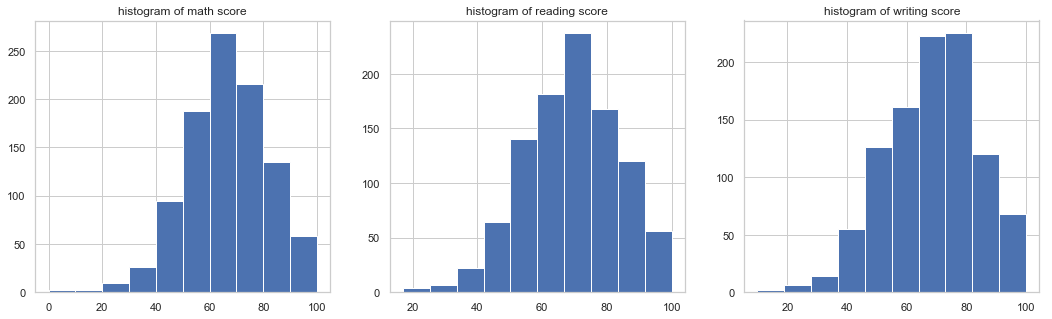

In [17]:
# Plot socre variables 

plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
plt.hist(education_df["math score"])
plt.title("histogram of math score")

plt.subplot(1, 3, 2)
plt.hist(education_df["reading score"])
plt.title("histogram of reading score")

plt.subplot(1, 3, 3)
plt.hist(education_df["writing score"])
plt.title("histogram of writing score")

plt.show()

The exams scores are not normally distributed. It appears that they are all slightly skewed to the left. Next, we will apply a Box-Cox transformation.

In [15]:
from scipy.stats import boxcox

# there is an observation with math score is equal to 0
# since box-cox transformation only works with positive data
# we are excluding it.

math_boxcox,_ = boxcox(education_df[education_df["math score"] > 0]["math score"])
reading_boxcox,_ = boxcox(education_df["reading score"])
writing_boxcox,_  = boxcox(education_df["writing score"])


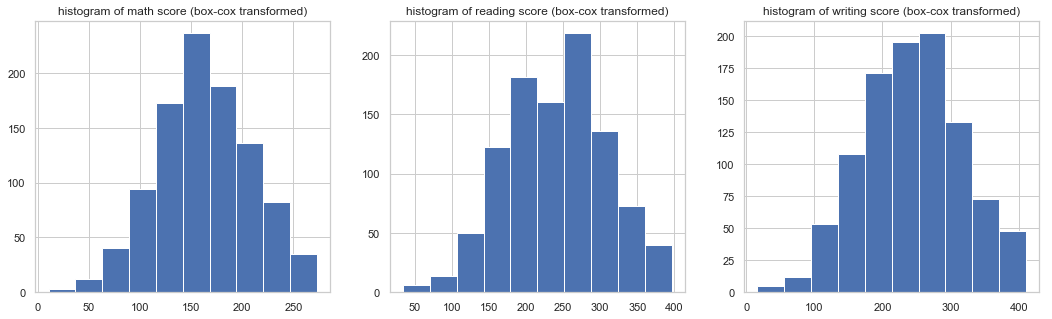

In [18]:
# Plot Box-Cox transformation

plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
plt.hist(math_boxcox)
plt.title("histogram of math score (box-cox transformed)")

plt.subplot(1, 3, 2)
plt.hist(reading_boxcox)
plt.title("histogram of reading score (box-cox transformed)")

plt.subplot(1, 3, 3)
plt.hist(writing_boxcox)
plt.title("histogram of writing score (box-cox transformed)")
            
plt.show()


After a Box-Cox transformation, the distribution still looks much closer to a normal distribution. Let's check with the Jarque-Bera and Normal tests.

In [19]:
# Check if score variables are normalized

from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(education_df["math score"])
norm_stats = normaltest(education_df["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(education_df["reading score"])
norm_stats = normaltest(education_df["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(education_df["writing score"])
norm_stats = normaltest(education_df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


All the p-values are 0, indicating that the exam scores are significantly different from a normal distribution. 

In [20]:
# Check if boxcox variables are normalized 

jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.720098104874378 and p value is 0.4231413256953709
Normality test statistics is 1.8323073377495822 and p value is 0.40005482895717037
Jarque-Bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics is 5.282274611852865 and p value is 0.07128015609575467
Jarque-Bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics is 6.267311355043339 and p value is 0.04355827085023795


After we applied Box-Cox transformation, the distributions come closer to the normal distribution shape.

#### 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [21]:
# Create new variable 

ave_score = (education_df['math score'] + education_df['reading score']
            + education_df['writing score'])/3

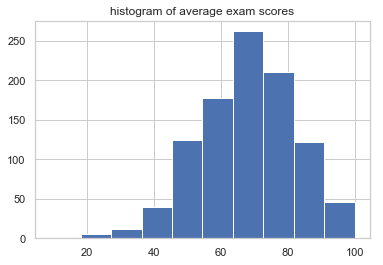

Jarque-Bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics is 6.267311355043339 and p value is 0.04355827085023795


In [23]:
# Plot new variable 

plt.hist(ave_score)
plt.title('histogram of average exam scores')
plt.show()

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


Since the p-value is 0, the average exam score is different from a normal distribution. 

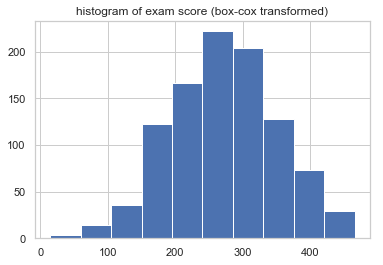

Jarque-Bera test statistics is 2.4353987431906026 and p value is 0.29591016374203183
Normality test statistics is 2.779857245981238 and p value is 0.2490930835165177


In [24]:
# Apply Box-Cox transformation 

exams_boxcox,_ = boxcox(ave_score)

plt.hist(exams_boxcox)
plt.title("histogram of exam score (box-cox transformed)")
plt.show()

jb_stats = jarque_bera(exams_boxcox)
norm_stats = normaltest(exams_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

After we applied Box-Cox transformation, the transformed variable is now normally distributed. Jarque-Bera and Normal tests also confirm this.

#### 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

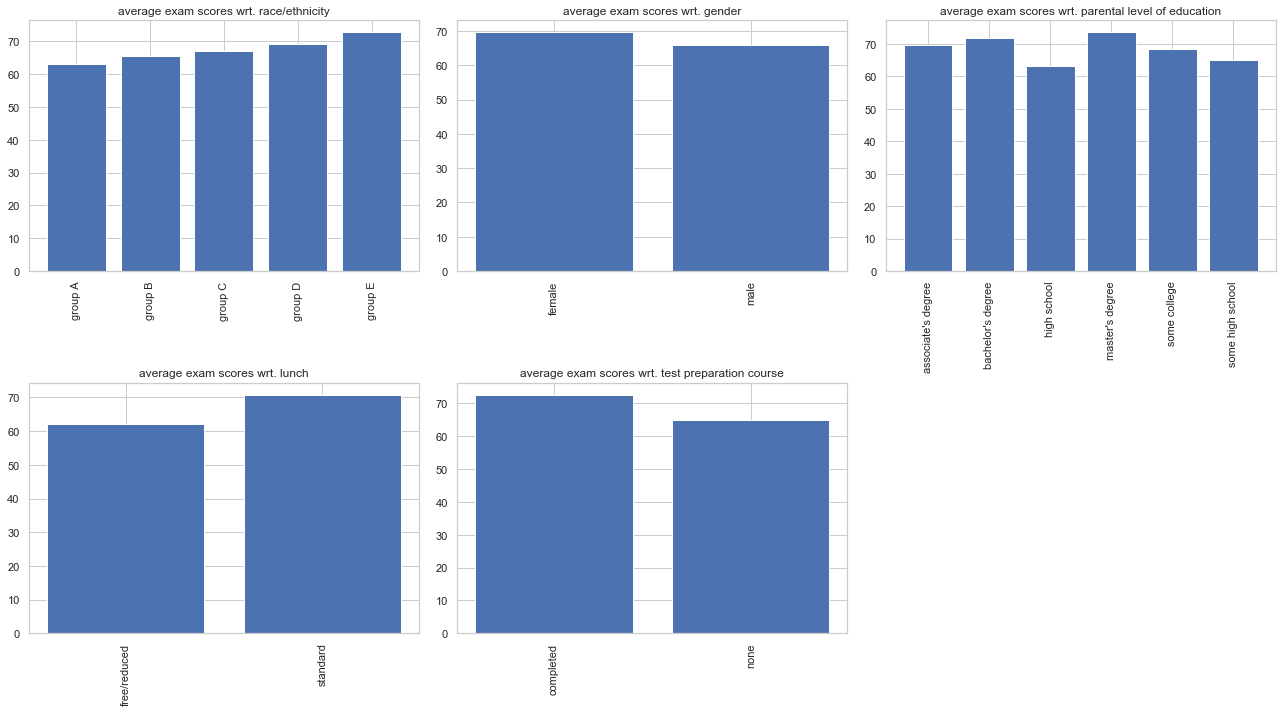

In [25]:
# Add ave_score to education df 

education_df["ave_score"] = ave_score

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.bar(education_df.groupby("race/ethnicity")
        ["ave_score"].mean().index, education_df.groupby("race/ethnicity")["ave_score"].mean())

plt.title("average exam scores wrt. race/ethnicity")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(education_df.groupby("gender")
        ["ave_score"].mean().index, education_df.groupby("gender")["ave_score"].mean())

plt.title("average exam scores wrt. gender")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(education_df.groupby("parental level of education")
        ["ave_score"].mean().index, education_df.groupby("parental level of education")["ave_score"].mean())

plt.title("average exam scores wrt. parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(education_df.groupby("lunch")
        ["ave_score"].mean().index, education_df.groupby("lunch")["ave_score"].mean())

plt.title("average exam scores wrt. lunch")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(education_df.groupby("test preparation course")
        ["ave_score"].mean().index, education_df.groupby("test preparation course")["ave_score"].mean())

plt.title("average exam scores wrt. test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

Average exam score increases from group A to group E. Hence race/ethnicity may play an important role in explaining the successes in the exams.

Female students seem to be more successful than the males.

There is also some variation between the parental levels of education with respect to the exam scores.

Lunch type also exhibits variance in the average exam scores. But, this is probably not because of the lunch type itself but because of something that affects both the lunch type and the exam scores.

Those who completed the test preparation course seem to be more successful than the others.

Considering all these, all variables might be used in explaining the success in the exams but the lunch variable should be used precautiously.